# CharithNet: Covid 19 Identification Using Convolutional Neural Networks with chest X-ray


Created By Lalith Kahatapitiya at [PGIS](http://www.pgis.pdn.ac.lk/) - University of Peradeniya

# Data set Credit :
1. [Covid Chest X Ray Dataset](https://github.com/ieee8023/covid-chestxray-dataset)
2. [Pneumonia dataset by Praveen](https://www.kaggle.com/praveengovi/coronahack-chest-xraydataset)
3. [COVID19 chest XRAY analysis by SAIMANASA_C](https://www.kaggle.com/code/saimanasachadalavada/covid19-chest-xray-analysis/data)
4. [COVID19 with Pneumonia and Normal Chest Xray(PA) Dataset by AMANULLAH ASRAF](https://www.kaggle.com/datasets/amanullahasraf/covid19-pneumonia-normal-chest-xray-pa-dataset)
5. [HASH_Directors - Covid19 by AMRUTH AMBRISH K](https://www.kaggle.com/code/amruthambrish/hash-directors-covid19/data)
6. [RICORD COVID-19 X-ray positive tests by RADDAR](https://www.kaggle.com/datasets/raddar/ricord-covid19-xray-positive-tests)


# This is the result from each version run on the Kaggle.

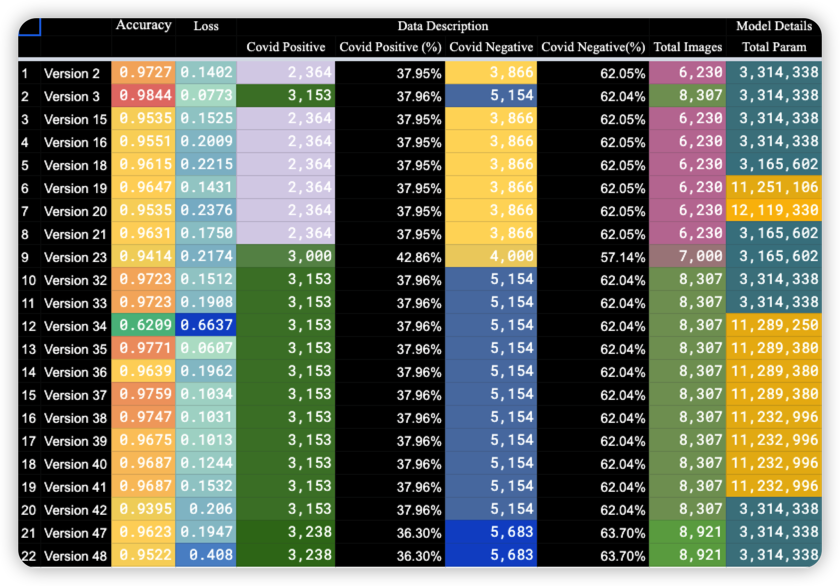


[Datasheet](https://docs.google.com/spreadsheets/d/1wtD3Gx3iLCJO_bs5j1wgDMO9EsDAjMM1aXyK1AUhnHY/edit?usp=sharing)

# System Parameter show




In [1]:
from tqdm import tqdm
import seaborn as sns
from matplotlib import pyplot as plt
import cv2
import numpy as np
import sklearn as sk
import pandas as pd
import tensorflow as tf
import tensorflow.keras
import shutil
import random
import sys
import platform
import os
import datetime
import pytz
import imutils

timezone = pytz.timezone("Asia/Colombo")

import matplotlib.cm as cm

from IPython.display import Image, display
# for GradCAM
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.models import Model
# for confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
# for model creation
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras import Input
from tensorflow.keras.callbacks import ModelCheckpoint
# for data array separation
from sklearn.model_selection import train_test_split
# for model validation
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics


print(f"Python Platform: {platform.platform()}")
print(f"Python {sys.version}")
print()
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"Numpy {np.__version__}")
print(f"Open CV {cv2.__version__}")
print()
gpu = len(tf.config.list_physical_devices('GPU')) > 0
print("GPU is", "available" if gpu else "NOT AVAILABLE")


# def working_dir_clean():
#     list_all_file=os.listdir("./")
#     for file_name in list_all_file:
#         try:
#             shutil.rmtree("./"+file_name)
#             print(f"Remove File Name : {file_name}")

#         except Exception as e:
#             print('Exception:',e)
#                     #if any exception rasied, the exception will be printed here. And pass to the next image

# working_dir_clean()

Python Platform: macOS-13.0.1-arm64-arm-64bit
Python 3.9.13 | packaged by conda-forge | (main, May 27 2022, 17:00:33) 
[Clang 13.0.1 ]

Tensor Flow Version: 2.10.0
Keras Version: 2.10.0
Pandas 1.5.0
Scikit-Learn 1.1.2
Numpy 1.23.2
Open CV 4.6.0

GPU is available


# Data Set Location Verified and Find Image's Folder

In [2]:
# image data set_path mapping check folder names
dataset_path = 'TRAINING'
# categories = os.listdir(dataset_path)
# print(categories)

# Data Labels creation

In [3]:
categories_all = os.listdir(dataset_path)
categories = []
for category in categories_all:
    if (category == ".DS_Store"):
        continue
    else:
        categories.append(category)

labels = [i for i in range(len(categories))]

label_dict = dict(zip(categories, labels))  # empty dictionary


print(label_dict)
print(categories)
print(labels)

{'NORMAL': 0, 'COVID': 1}
['NORMAL', 'COVID']
[0, 1]


# Images count in each folder

In [4]:
# "COVID-19"
folder_path_covid = [
    "TRAINING/COVID",
]


img_path_covid_old = []
for folder_path in folder_path_covid:
    img_names = os.listdir(folder_path)
    for img_name in img_names:
        img_path = os.path.join(folder_path, img_name)
        img_path_covid_old.append(img_path)


# "NON-COVID"
folder_path_non_covid = [
    "TRAINING/NORMAL",
]


img_path_non_covid_old = []
for folder_path in folder_path_non_covid:
    img_names = os.listdir(folder_path)
    for img_name in img_names:
        img_path = os.path.join(folder_path, img_name)
        img_path_non_covid_old.append(img_path)

        # images array shuffles
img_path_covid_old = random.sample(img_path_covid_old, len(img_path_covid_old))
img_path_non_covid_old = random.sample(
    img_path_non_covid_old, len(img_path_non_covid_old))

total_ca_images = len(img_path_covid_old) + len(img_path_non_covid_old)

print(f"Containe Covid images count     : {len(img_path_covid_old)}")
print(f"Non covid images count : {len(img_path_non_covid_old)}")
print(f"All images count       : {total_ca_images} \n")

#  images array lenth
divider = 1
middle_img_path_covid = int(len(img_path_covid_old)/divider)
middle_img_path_non_covid = int(len(img_path_non_covid_old)/divider)

# middle_img_path_covid = 4099
# middle_img_path_non_covid = middle_img_path_covid

img_path_covid = img_path_covid_old[:middle_img_path_covid]
img_path_non_covid = img_path_non_covid_old[:middle_img_path_non_covid]

total_images = len(img_path_non_covid) + len(img_path_covid)

print(f"Covid images count     : {len(img_path_covid)}")
print(f"Non covid images count : {len(img_path_non_covid)}")
print(f"All images count       : {total_images}")
print(
    f"Covid images           : {round((len(img_path_covid)/total_images)*100, 2)} %")
print(
    f"Non covid images       : {round((len(img_path_non_covid)/total_images)*100, 2)} %")

Containe Covid images count     : 4099
Non covid images count : 5361
All images count       : 9460 

Covid images count     : 4099
Non covid images count : 5361
All images count       : 9460
Covid images           : 43.33 %
Non covid images       : 56.67 %


# Read selected images to array

In [5]:
start_time = datetime.datetime.now(tz=timezone)
print(f"Start images reading :{start_time}")
img_size = 224
data = []
target = []
covid = []
normal = []


def image_read(img_path):
    img = cv2.imread(img_path)
    try:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Coverting the image into gray scale
        resized = cv2.resize(gray, (img_size, img_size))
        # resizing the gray scale into 224x224, since we need a fixed common size for all the images in the dataset
        return True, resized

    except Exception as e:

        # if any exception rasied, the exception will be return here. And pass to the next image
        return False, e


for img_path in img_path_covid:
    success, resized = image_read(img_path)
    if (success == False):
        print("non covid images error")
    else:
        covid.append(resized)
        target.append(label_dict["COVID"])


for img_path in img_path_non_covid:
    success, resized = image_read(img_path)
    if (success == False):
        print("covid images error")
    else:
        normal.append(resized)
        target.append(label_dict["NORMAL"])


data = covid + normal
end_time = datetime.datetime.now(tz=timezone)
print(f"End images reading :{end_time}")

print(f"Total time taken {end_time-start_time}")

Start images reading :2022-11-21 21:40:18.444247+05:30


libpng warning: cHRM: invalid values


covid images error
End images reading :2022-11-21 21:42:32.511902+05:30
Total time taken 0:02:14.067655


# Normal Chest X-Ray Images

100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 287.00it/s]


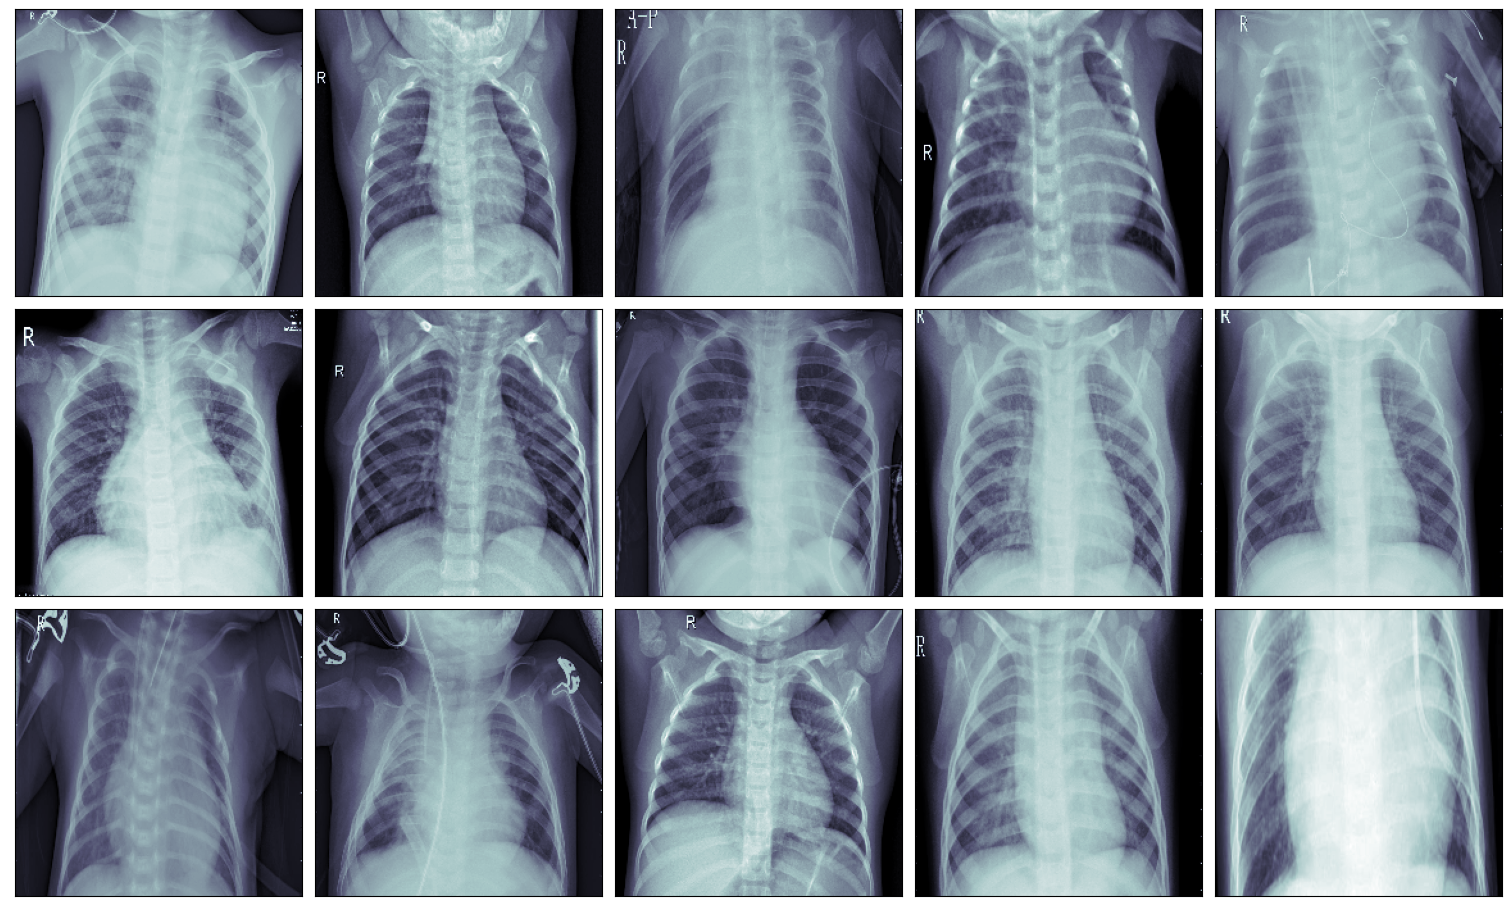

In [6]:
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize=(
    n_col*3, n_row*3), constrained_layout=True)

for row in tqdm(range(n_row)):

    for col in range(n_col):
        ax[row][col].imshow(normal[row*n_col + col], cmap='bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])

# Covid Positive Chest X-Ray Images

100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 492.52it/s]


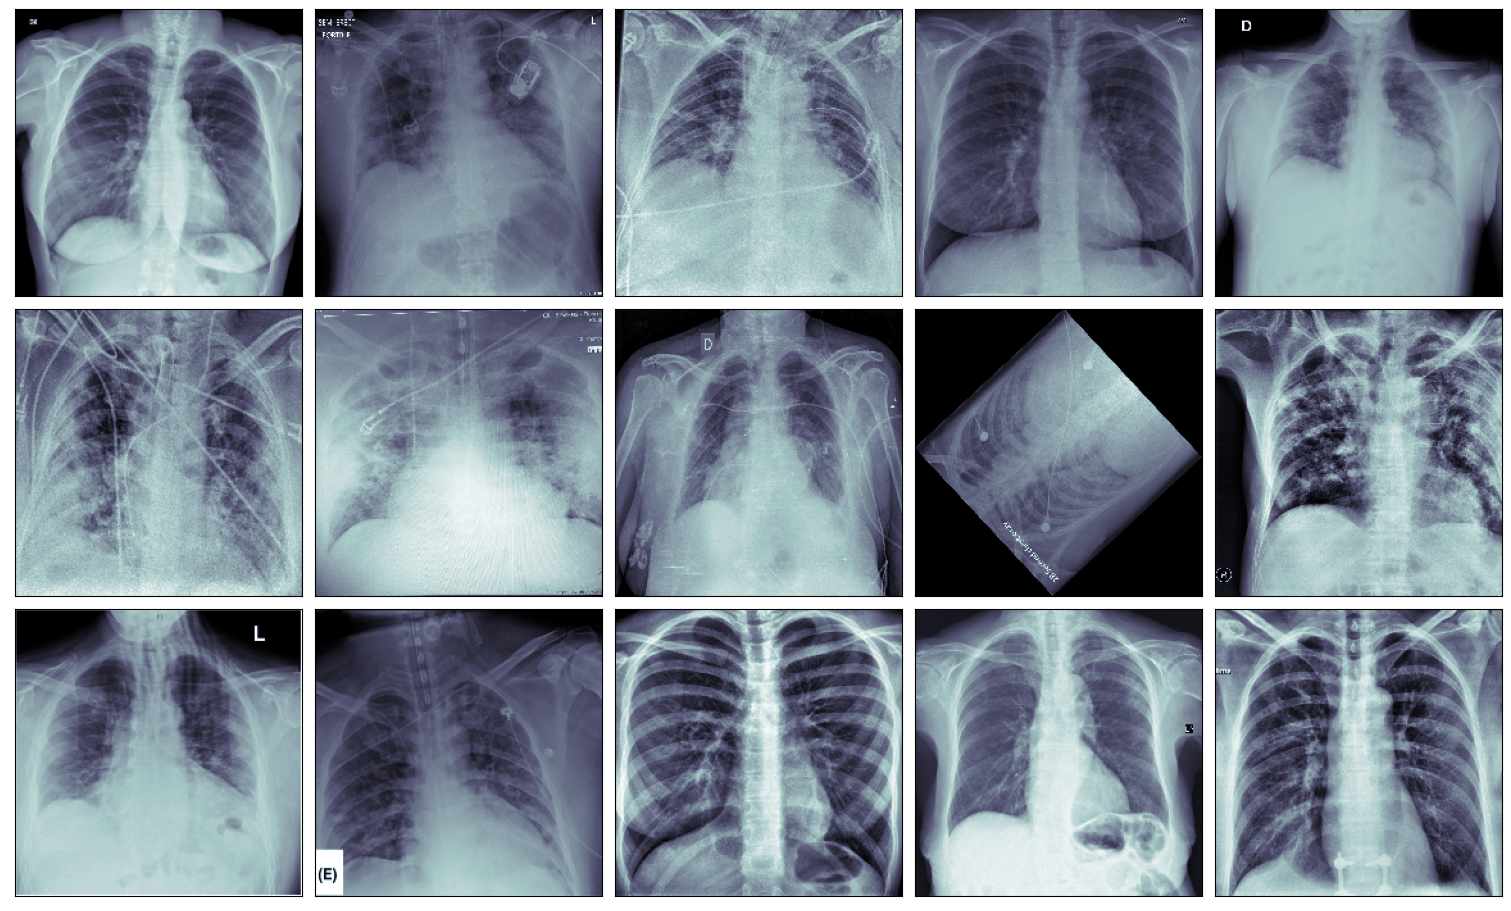

In [7]:
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize=(
    n_col*3, n_row*3), constrained_layout=True)

for row in tqdm(range(n_row)):

    for col in range(n_col):

        ax[row][col].imshow(covid[row*n_col + col], cmap='bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])

# Wanbd configuration 

In [8]:
from wandb.keras import WandbCallback
import wandb
wandb_api_key = '52c82ac93c7b3a43eab4eee3ee4264af086187eb'
print("W&B: ", wandb.__version__)


start_time = datetime.datetime.now(tz=timezone)
name = f'{start_time}-model-run'
wandb.init(
    project="covid-19-identification-with-chest-x-ray",
    name=name
)
# wandb. init(mode="disabled")

W&B:  0.13.4


wandb: Currently logged in as: lalithk90. Use `wandb login --relogin` to force relogin


# Data array transfer to numpy array and change shape

In [9]:
data = np.array(data)/255.0
data = np.reshape(data, (data.shape[0], img_size, img_size, 1))
target = np.array(target)


new_target = tf.keras.utils.to_categorical(target)


print(
    f"Data shape : {data.shape} \nTarget shape : {target.shape} \nNew Target shape : {new_target.shape}")

Data shape : (9459, 224, 224, 1) 
Target shape : (9459,) 
New Target shape : (9459, 2)


# Model Creation



In [10]:

input_shape = data.shape[1:]  # 50,50,1
inp = Input(shape=input_shape)
convs = []

parrallel_kernels = [1, 2, 3, 4]

for k in range(len(parrallel_kernels)):
    if (k != 0):
        conv = Conv2D(128, kernel_size=k, padding='same',activation='relu')(inp)
        convs.append(conv)

out = Concatenate()(convs)
conv_model = Model(inp, out)

model = Sequential()
model.add(conv_model)

# Hidden Layer 
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Hidden Layer 
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Hidden Layer 
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Output layer
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, input_dim=128, activation='sigmoid'))

Metal device set to: Apple M1 Pro


2022-11-21 21:42:44.359819: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-21 21:42:44.360604: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Model Compile

In [11]:
METRICS = [
    'accuracy',
    "sparse_categorical_accuracy",
    'mean_squared_error',
    'mean_absolute_error',
    'mean_absolute_percentage_error',
    'mean_squared_logarithmic_error',
    'cosine_similarity',
    'logcosh',
]

LOSS = 'sparse_categorical_crossentropy'

OPTIMIZER = 'adam'

model.compile(loss=LOSS,
              optimizer=OPTIMIZER,
              metrics=METRICS)

# Model Summary

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 224, 224, 384)     2176      
                                                                 
 conv2d_3 (Conv2D)           (None, 222, 222, 128)     442496    
                                                                 
 activation (Activation)     (None, 222, 222, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 128)    0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 activation_1 (Activation)   (None, 109, 109, 64)      0         
                                                        

# Data Array Spliting

In [13]:
train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.1)

print(type(train_data))
print(
    f"Training Data shape : {train_data.shape} \nTraining Target shape : {train_target.shape}")
print(
    f"Test Data shape : {test_data.shape} \nTest Target shape : {test_target.shape}")

<class 'numpy.ndarray'>
Training Data shape : (8513, 224, 224, 1) 
Training Target shape : (8513,)
Test Data shape : (946, 224, 224, 1) 
Test Target shape : (946,)


# Model Training

In [14]:
start_time = datetime.datetime.now(tz=timezone)
print(f"Start checkpoint creation:{start_time}")
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')

print(len(train_data))
history = model.fit(train_data,
                    train_target,
                    epochs=25,
                    callbacks=[checkpoint, WandbCallback()],
                    validation_data=(test_data, test_target))

end_time = datetime.datetime.now(tz=timezone)
print(f"End checkpoint creation:{end_time}")
print(f"Total time taken {end_time-start_time}")

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Start checkpoint creation:2022-11-21 21:42:48.645940+05:30
8513
Epoch 1/25


2022-11-21 21:42:57.861198: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-21 21:42:58.695399: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


267/267 [==============================] - ETA: 0s - loss: 0.2431 - accuracy: 0.8970 - sparse_categorical_accuracy: 0.8970 - mean_squared_error: 0.3659 - mean_absolute_error: 0.4940 - mean_absolute_percentage_error: 261139744.0000 - mean_squared_logarithmic_error: 0.1769 - cosine_similarity: 0.5290 - logcosh: 0.1650

2022-11-21 21:53:52.096379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.96934, saving model to model-001.model


INFO:tensorflow:Assets written to: model-001.model/assets


INFO:tensorflow:Assets written to: model-001.model/assets


INFO:tensorflow:Assets written to: /Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best/assets
wandb: Adding directory to artifact (/Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best)... Done. 0.1s


267/267 [==============================] - 681s 3s/step - loss: 0.2431 - accuracy: 0.8970 - sparse_categorical_accuracy: 0.8970 - mean_squared_error: 0.3659 - mean_absolute_error: 0.4940 - mean_absolute_percentage_error: 261139744.0000 - mean_squared_logarithmic_error: 0.1769 - cosine_similarity: 0.5290 - logcosh: 0.1650 - val_loss: 0.1095 - val_accuracy: 0.9693 - val_sparse_categorical_accuracy: 0.9693 - val_mean_squared_error: 0.3878 - val_mean_absolute_error: 0.4834 - val_mean_absolute_percentage_error: 265809488.0000 - val_mean_squared_logarithmic_error: 0.1947 - val_cosine_similarity: 0.4480 - val_logcosh: 0.1730
Epoch 2/25
267/267 [==============================] - ETA: 0s - loss: 0.0793 - accuracy: 0.9751 - sparse_categorical_accuracy: 0.9751 - mean_squared_error: 0.4150 - mean_absolute_error: 0.4980 - mean_absolute_percentage_error: 256255136.0000 - mean_squared_logarithmic_error: 0.2001 - cosine_similarity: 0.4802 - logcosh: 0.1841
Epoch 2: val_accuracy improved from 0.96934 t

INFO:tensorflow:Assets written to: model-002.model/assets


INFO:tensorflow:Assets written to: model-002.model/assets


INFO:tensorflow:Assets written to: /Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best/assets
wandb: Adding directory to artifact (/Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best)... Done. 0.1s


267/267 [==============================] - 657s 2s/step - loss: 0.0793 - accuracy: 0.9751 - sparse_categorical_accuracy: 0.9751 - mean_squared_error: 0.4150 - mean_absolute_error: 0.4980 - mean_absolute_percentage_error: 256255136.0000 - mean_squared_logarithmic_error: 0.2001 - cosine_similarity: 0.4802 - logcosh: 0.1841 - val_loss: 0.0672 - val_accuracy: 0.9810 - val_sparse_categorical_accuracy: 0.9810 - val_mean_squared_error: 0.4145 - val_mean_absolute_error: 0.4941 - val_mean_absolute_percentage_error: 274537472.0000 - val_mean_squared_logarithmic_error: 0.2047 - val_cosine_similarity: 0.4477 - val_logcosh: 0.1838
Epoch 3/25
267/267 [==============================] - ETA: 0s - loss: 0.0498 - accuracy: 0.9817 - sparse_categorical_accuracy: 0.9817 - mean_squared_error: 0.4479 - mean_absolute_error: 0.5119 - mean_absolute_percentage_error: 275532224.0000 - mean_squared_logarithmic_error: 0.2163 - cosine_similarity: 0.4670 - logcosh: 0.1975
Epoch 3: val_accuracy improved from 0.98097 t

INFO:tensorflow:Assets written to: model-003.model/assets


INFO:tensorflow:Assets written to: model-003.model/assets


INFO:tensorflow:Assets written to: /Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best/assets
wandb: Adding directory to artifact (/Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best)... Done. 0.1s


267/267 [==============================] - 659s 2s/step - loss: 0.0498 - accuracy: 0.9817 - sparse_categorical_accuracy: 0.9817 - mean_squared_error: 0.4479 - mean_absolute_error: 0.5119 - mean_absolute_percentage_error: 275532224.0000 - mean_squared_logarithmic_error: 0.2163 - cosine_similarity: 0.4670 - logcosh: 0.1975 - val_loss: 0.0452 - val_accuracy: 0.9841 - val_sparse_categorical_accuracy: 0.9841 - val_mean_squared_error: 0.4398 - val_mean_absolute_error: 0.4977 - val_mean_absolute_percentage_error: 282119424.0000 - val_mean_squared_logarithmic_error: 0.2122 - val_cosine_similarity: 0.4547 - val_logcosh: 0.1937
Epoch 4/25
267/267 [==============================] - ETA: 0s - loss: 0.0484 - accuracy: 0.9845 - sparse_categorical_accuracy: 0.9845 - mean_squared_error: 0.4443 - mean_absolute_error: 0.5054 - mean_absolute_percentage_error: 274709376.0000 - mean_squared_logarithmic_error: 0.2152 - cosine_similarity: 0.4655 - logcosh: 0.1958
Epoch 4: val_accuracy did not improve from 0.

INFO:tensorflow:Assets written to: model-005.model/assets


INFO:tensorflow:Assets written to: model-005.model/assets


INFO:tensorflow:Assets written to: /Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best/assets
wandb: Adding directory to artifact (/Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best)... Done. 0.1s


267/267 [==============================] - 653s 2s/step - loss: 0.0517 - accuracy: 0.9845 - sparse_categorical_accuracy: 0.9845 - mean_squared_error: 0.4472 - mean_absolute_error: 0.5076 - mean_absolute_percentage_error: 277485696.0000 - mean_squared_logarithmic_error: 0.2164 - cosine_similarity: 0.4676 - logcosh: 0.1971 - val_loss: 0.0417 - val_accuracy: 0.9852 - val_sparse_categorical_accuracy: 0.9852 - val_mean_squared_error: 0.4604 - val_mean_absolute_error: 0.5014 - val_mean_absolute_percentage_error: 276711904.0000 - val_mean_squared_logarithmic_error: 0.2218 - val_cosine_similarity: 0.4442 - val_logcosh: 0.2018
Epoch 6/25
267/267 [==============================] - ETA: 0s - loss: 0.0487 - accuracy: 0.9846 - sparse_categorical_accuracy: 0.9846 - mean_squared_error: 0.4442 - mean_absolute_error: 0.5031 - mean_absolute_percentage_error: 267045328.0000 - mean_squared_logarithmic_error: 0.2146 - cosine_similarity: 0.4636 - logcosh: 0.1956
Epoch 6: val_accuracy did not improve from 0.

INFO:tensorflow:Assets written to: model-007.model/assets


INFO:tensorflow:Assets written to: model-007.model/assets


INFO:tensorflow:Assets written to: /Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best/assets
wandb: Adding directory to artifact (/Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best)... Done. 0.1s


267/267 [==============================] - 564s 2s/step - loss: 0.0366 - accuracy: 0.9870 - sparse_categorical_accuracy: 0.9870 - mean_squared_error: 0.4595 - mean_absolute_error: 0.5137 - mean_absolute_percentage_error: 275059616.0000 - mean_squared_logarithmic_error: 0.2219 - cosine_similarity: 0.4600 - logcosh: 0.2020 - val_loss: 0.0392 - val_accuracy: 0.9873 - val_sparse_categorical_accuracy: 0.9873 - val_mean_squared_error: 0.4606 - val_mean_absolute_error: 0.4978 - val_mean_absolute_percentage_error: 282110560.0000 - val_mean_squared_logarithmic_error: 0.2226 - val_cosine_similarity: 0.4404 - val_logcosh: 0.2017
Epoch 8/25
267/267 [==============================] - ETA: 0s - loss: 0.0368 - accuracy: 0.9885 - sparse_categorical_accuracy: 0.9885 - mean_squared_error: 0.4652 - mean_absolute_error: 0.5170 - mean_absolute_percentage_error: 290050496.0000 - mean_squared_logarithmic_error: 0.2242 - cosine_similarity: 0.4667 - logcosh: 0.2045
Epoch 8: val_accuracy did not improve from 0.

INFO:tensorflow:Assets written to: model-009.model/assets


INFO:tensorflow:Assets written to: model-009.model/assets


INFO:tensorflow:Assets written to: /Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best/assets
wandb: Adding directory to artifact (/Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best)... Done. 0.1s


267/267 [==============================] - 564s 2s/step - loss: 0.0370 - accuracy: 0.9874 - sparse_categorical_accuracy: 0.9874 - mean_squared_error: 0.4561 - mean_absolute_error: 0.5048 - mean_absolute_percentage_error: 278262976.0000 - mean_squared_logarithmic_error: 0.2210 - cosine_similarity: 0.4622 - logcosh: 0.2005 - val_loss: 0.0330 - val_accuracy: 0.9894 - val_sparse_categorical_accuracy: 0.9894 - val_mean_squared_error: 0.4736 - val_mean_absolute_error: 0.4957 - val_mean_absolute_percentage_error: 280203328.0000 - val_mean_squared_logarithmic_error: 0.2294 - val_cosine_similarity: 0.4310 - val_logcosh: 0.2067
Epoch 10/25
267/267 [==============================] - ETA: 0s - loss: 0.0335 - accuracy: 0.9890 - sparse_categorical_accuracy: 0.9890 - mean_squared_error: 0.4665 - mean_absolute_error: 0.5099 - mean_absolute_percentage_error: 282384000.0000 - mean_squared_logarithmic_error: 0.2256 - cosine_similarity: 0.4592 - logcosh: 0.2046
Epoch 10: val_accuracy did not improve from 

INFO:tensorflow:Assets written to: /Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best/assets
wandb: Adding directory to artifact (/Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best)... Done. 0.1s


267/267 [==============================] - 566s 2s/step - loss: 0.0335 - accuracy: 0.9890 - sparse_categorical_accuracy: 0.9890 - mean_squared_error: 0.4665 - mean_absolute_error: 0.5099 - mean_absolute_percentage_error: 282384000.0000 - mean_squared_logarithmic_error: 0.2256 - cosine_similarity: 0.4592 - logcosh: 0.2046 - val_loss: 0.0316 - val_accuracy: 0.9863 - val_sparse_categorical_accuracy: 0.9863 - val_mean_squared_error: 0.4539 - val_mean_absolute_error: 0.5016 - val_mean_absolute_percentage_error: 281795712.0000 - val_mean_squared_logarithmic_error: 0.2214 - val_cosine_similarity: 0.4377 - val_logcosh: 0.1992
Epoch 11/25
267/267 [==============================] - ETA: 0s - loss: 0.0238 - accuracy: 0.9919 - sparse_categorical_accuracy: 0.9919 - mean_squared_error: 0.4744 - mean_absolute_error: 0.5179 - mean_absolute_percentage_error: 288899584.0000 - mean_squared_logarithmic_error: 0.2290 - cosine_similarity: 0.4599 - logcosh: 0.2080
Epoch 11: val_accuracy improved from 0.98943

INFO:tensorflow:Assets written to: model-011.model/assets


INFO:tensorflow:Assets written to: model-011.model/assets


INFO:tensorflow:Assets written to: /Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best/assets
wandb: Adding directory to artifact (/Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best)... Done. 0.1s


267/267 [==============================] - 562s 2s/step - loss: 0.0238 - accuracy: 0.9919 - sparse_categorical_accuracy: 0.9919 - mean_squared_error: 0.4744 - mean_absolute_error: 0.5179 - mean_absolute_percentage_error: 288899584.0000 - mean_squared_logarithmic_error: 0.2290 - cosine_similarity: 0.4599 - logcosh: 0.2080 - val_loss: 0.0197 - val_accuracy: 0.9905 - val_sparse_categorical_accuracy: 0.9905 - val_mean_squared_error: 0.4773 - val_mean_absolute_error: 0.4994 - val_mean_absolute_percentage_error: 284592128.0000 - val_mean_squared_logarithmic_error: 0.2295 - val_cosine_similarity: 0.4367 - val_logcosh: 0.2082
Epoch 12/25
267/267 [==============================] - ETA: 0s - loss: 0.0241 - accuracy: 0.9894 - sparse_categorical_accuracy: 0.9894 - mean_squared_error: 0.4843 - mean_absolute_error: 0.5234 - mean_absolute_percentage_error: 294651808.0000 - mean_squared_logarithmic_error: 0.2329 - cosine_similarity: 0.4622 - logcosh: 0.2121
Epoch 12: val_accuracy did not improve from 

INFO:tensorflow:Assets written to: model-015.model/assets


INFO:tensorflow:Assets written to: model-015.model/assets


267/267 [==============================] - 563s 2s/step - loss: 0.0201 - accuracy: 0.9905 - sparse_categorical_accuracy: 0.9905 - mean_squared_error: 0.4907 - mean_absolute_error: 0.5288 - mean_absolute_percentage_error: 305035488.0000 - mean_squared_logarithmic_error: 0.2366 - cosine_similarity: 0.4611 - logcosh: 0.2149 - val_loss: 0.0260 - val_accuracy: 0.9915 - val_sparse_categorical_accuracy: 0.9915 - val_mean_squared_error: 0.4881 - val_mean_absolute_error: 0.4999 - val_mean_absolute_percentage_error: 286811168.0000 - val_mean_squared_logarithmic_error: 0.2354 - val_cosine_similarity: 0.4284 - val_logcosh: 0.2123
Epoch 16/25
267/267 [==============================] - ETA: 0s - loss: 0.0127 - accuracy: 0.9915 - sparse_categorical_accuracy: 0.9915 - mean_squared_error: 0.4943 - mean_absolute_error: 0.5279 - mean_absolute_percentage_error: 301687200.0000 - mean_squared_logarithmic_error: 0.2383 - cosine_similarity: 0.4576 - logcosh: 0.2163
Epoch 16: val_accuracy did not improve from 

INFO:tensorflow:Assets written to: model-022.model/assets


INFO:tensorflow:Assets written to: model-022.model/assets


INFO:tensorflow:Assets written to: /Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best/assets
wandb: Adding directory to artifact (/Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best)... Done. 0.1s


267/267 [==============================] - 559s 2s/step - loss: 0.0200 - accuracy: 0.9871 - sparse_categorical_accuracy: 0.9871 - mean_squared_error: 0.4957 - mean_absolute_error: 0.5301 - mean_absolute_percentage_error: 302995104.0000 - mean_squared_logarithmic_error: 0.2376 - cosine_similarity: 0.4673 - logcosh: 0.2168 - val_loss: 0.0182 - val_accuracy: 0.9937 - val_sparse_categorical_accuracy: 0.9937 - val_mean_squared_error: 0.4856 - val_mean_absolute_error: 0.4996 - val_mean_absolute_percentage_error: 287694528.0000 - val_mean_squared_logarithmic_error: 0.2341 - val_cosine_similarity: 0.4306 - val_logcosh: 0.2114
Epoch 23/25
267/267 [==============================] - ETA: 0s - loss: 0.0101 - accuracy: 0.9867 - sparse_categorical_accuracy: 0.9867 - mean_squared_error: 0.5070 - mean_absolute_error: 0.5354 - mean_absolute_percentage_error: 306690336.0000 - mean_squared_logarithmic_error: 0.2425 - cosine_similarity: 0.4632 - logcosh: 0.2214
Epoch 23: val_accuracy improved from 0.99366

INFO:tensorflow:Assets written to: model-023.model/assets


INFO:tensorflow:Assets written to: model-023.model/assets


267/267 [==============================] - 562s 2s/step - loss: 0.0101 - accuracy: 0.9867 - sparse_categorical_accuracy: 0.9867 - mean_squared_error: 0.5070 - mean_absolute_error: 0.5354 - mean_absolute_percentage_error: 306690336.0000 - mean_squared_logarithmic_error: 0.2425 - cosine_similarity: 0.4632 - logcosh: 0.2214 - val_loss: 0.0307 - val_accuracy: 0.9947 - val_sparse_categorical_accuracy: 0.9947 - val_mean_squared_error: 0.4893 - val_mean_absolute_error: 0.5000 - val_mean_absolute_percentage_error: 287823040.0000 - val_mean_squared_logarithmic_error: 0.2356 - val_cosine_similarity: 0.4295 - val_logcosh: 0.2128
Epoch 24/25
267/267 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 0.9885 - sparse_categorical_accuracy: 0.9885 - mean_squared_error: 0.5175 - mean_absolute_error: 0.5384 - mean_absolute_percentage_error: 310672608.0000 - mean_squared_logarithmic_error: 0.2476 - cosine_similarity: 0.4558 - logcosh: 0.2256
Epoch 24: val_accuracy did not improve from 

Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Internal Error (0000000e:Internal Error)
	<AGXG13XFamilyCommandBuffer: 0x4b5e0c290>
    label = <none> 
    device = <AGXG13XDevice: 0x15766b600>
        name = Apple M1 Pro 
    commandQueue = <AGXG13XFamilyCommandQueue: 0x155acd400>
        label = <none> 
        device = <AGXG13XDevice: 0x15766b600>
            name = Apple M1 Pro 
    retainedReferences = 1


267/267 [==============================] - ETA: 0s - loss: 0.0143 - accuracy: 0.9879 - sparse_categorical_accuracy: 0.9879 - mean_squared_error: 0.5079 - mean_absolute_error: 0.5356 - mean_absolute_percentage_error: 308328640.0000 - mean_squared_logarithmic_error: 0.2437 - cosine_similarity: 0.4563 - logcosh: 0.2217
Epoch 25: val_accuracy did not improve from 0.99471


INFO:tensorflow:Assets written to: /Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best/assets
wandb: Adding directory to artifact (/Users/lalithk90/Desktop/Independent Study/FINAL CUT/Covid-19-Identification-with-Chest-X-Ray/wandb/run-20221121_214237-37ulvznz/files/model-best)... Done. 0.1s


267/267 [==============================] - 564s 2s/step - loss: 0.0143 - accuracy: 0.9879 - sparse_categorical_accuracy: 0.9879 - mean_squared_error: 0.5079 - mean_absolute_error: 0.5356 - mean_absolute_percentage_error: 308328640.0000 - mean_squared_logarithmic_error: 0.2437 - cosine_similarity: 0.4563 - logcosh: 0.2217 - val_loss: 0.0172 - val_accuracy: 0.9947 - val_sparse_categorical_accuracy: 0.9947 - val_mean_squared_error: 0.4889 - val_mean_absolute_error: 0.5006 - val_mean_absolute_percentage_error: 288754752.0000 - val_mean_squared_logarithmic_error: 0.2350 - val_cosine_similarity: 0.4314 - val_logcosh: 0.2126
End checkpoint creation:2022-11-22 01:45:21.670963+05:30
Total time taken 4:02:33.025023


# Model Save

In [15]:
model.save('model-v5.h5')

# print model containe layers

In [16]:
for idx in range(len(model.layers)):
    print(f'Name : {model.get_layer(index=idx).name}, Shape :  {model.get_layer(index=idx).output_shape}')

Name : model, Shape :  (None, 224, 224, 384)
Name : conv2d_3, Shape :  (None, 222, 222, 128)
Name : activation, Shape :  (None, 222, 222, 128)
Name : max_pooling2d, Shape :  (None, 111, 111, 128)
Name : conv2d_4, Shape :  (None, 109, 109, 64)
Name : activation_1, Shape :  (None, 109, 109, 64)
Name : max_pooling2d_1, Shape :  (None, 54, 54, 64)
Name : conv2d_5, Shape :  (None, 52, 52, 32)
Name : activation_2, Shape :  (None, 52, 52, 32)
Name : max_pooling2d_2, Shape :  (None, 26, 26, 32)
Name : flatten, Shape :  (None, 21632)
Name : dropout, Shape :  (None, 21632)
Name : dense, Shape :  (None, 128)
Name : dropout_1, Shape :  (None, 128)
Name : dense_1, Shape :  (None, 64)
Name : dropout_2, Shape :  (None, 64)
Name : dense_2, Shape :  (None, 32)
Name : dropout_3, Shape :  (None, 32)
Name : dense_3, Shape :  (None, 2)


# Plot model to png

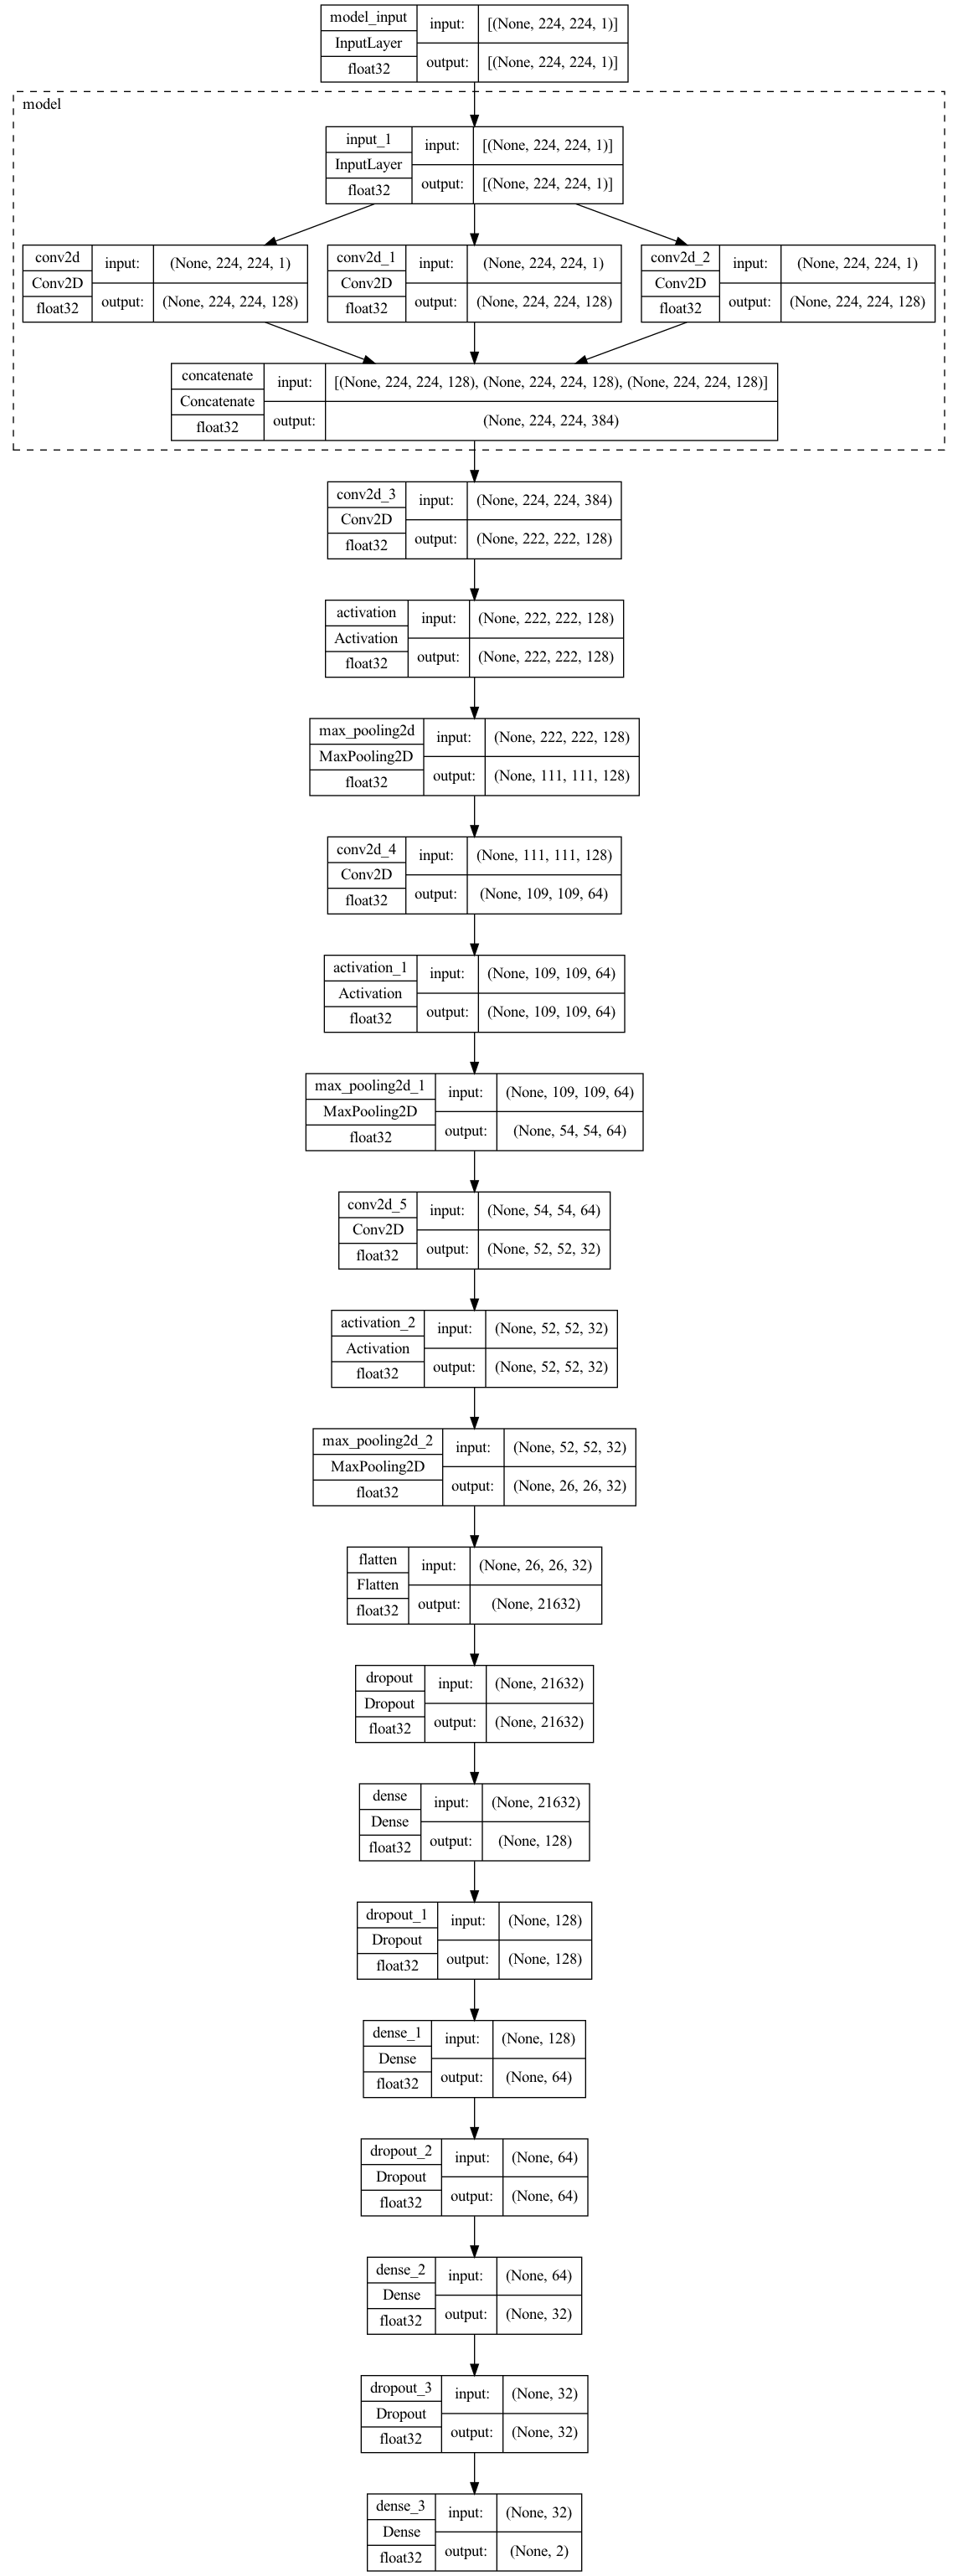

In [17]:
# plot model as image
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=96,
)

In [18]:
# date labeling confusion was removed

X_train = train_data
Y_train = train_target

x_test = test_data
y_test = test_target

# Valued to plot in epochs training's history

## Training and validation accuracy Model

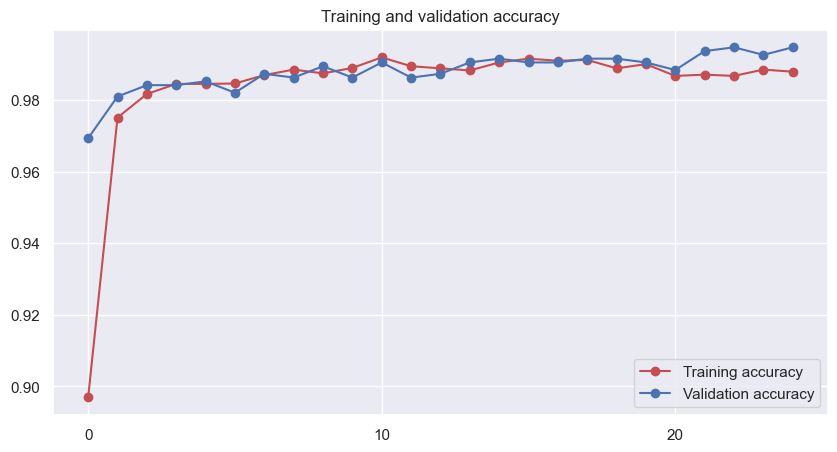

<Figure size 640x480 with 0 Axes>

In [19]:
sns.set()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(0, len(acc))
fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.plot(epochs, acc, 'r', label='Training accuracy', marker="o")
plt.plot(epochs, val_acc, 'b', label='Validation accuracy', marker="o")
plt.title('Training and validation accuracy')
plt.xticks(np.arange(0, len(acc), 10))
plt.legend(loc=0)
#plt.savefig('Multiclass Model .png')
plt.figure()
plt.show()

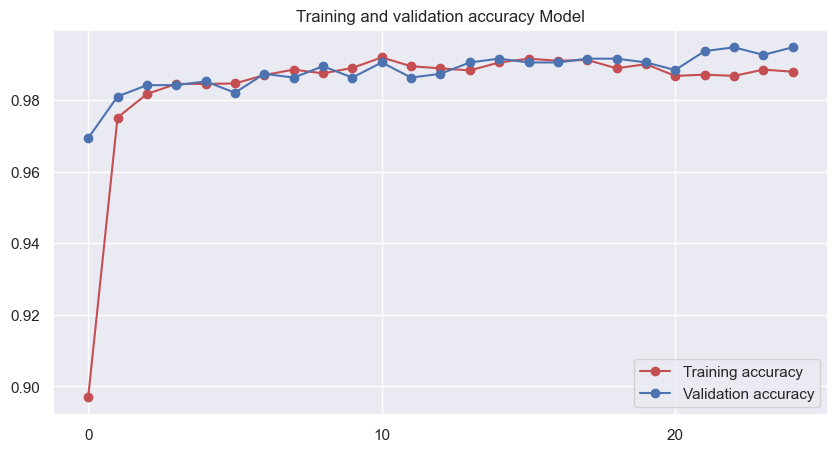

<Figure size 640x480 with 0 Axes>

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(0,len(acc))
fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.plot(epochs, acc, 'r', label='Training accuracy',marker = "o")
plt.plot(epochs, val_acc, 'b', label='Validation accuracy',marker = "o")
plt.title('Training and validation accuracy Model')
plt.xticks(np.arange(0, len(acc), 10))
plt.legend(loc=0)
plt.figure()
plt.show()

## Training and validation Loss Model

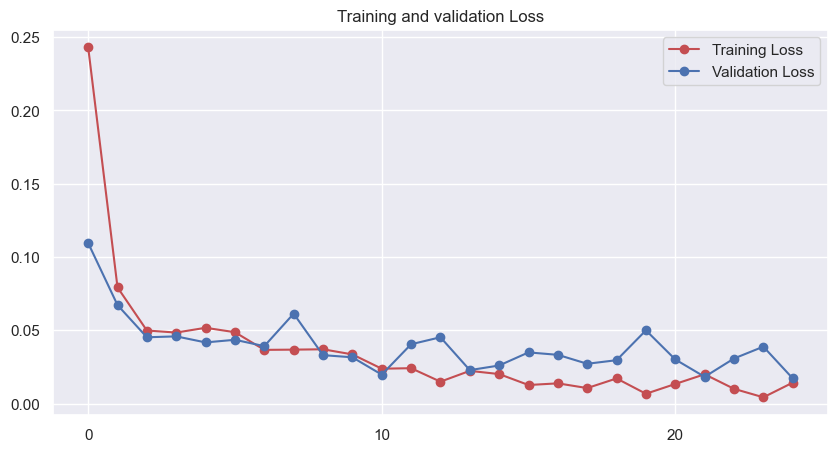

<Figure size 640x480 with 0 Axes>

In [21]:
sns.set()
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(0, len(acc))
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.plot(epochs, loss, 'r', label='Training Loss', marker="o")
plt.plot(epochs, val_loss, 'b', label='Validation Loss', marker="o")
plt.title('Training and validation Loss')
plt.xticks(np.arange(0, len(acc), 10))
plt.legend(loc=0)
#plt.savefig('Multiclass Model .png')
plt.figure()
plt.show()

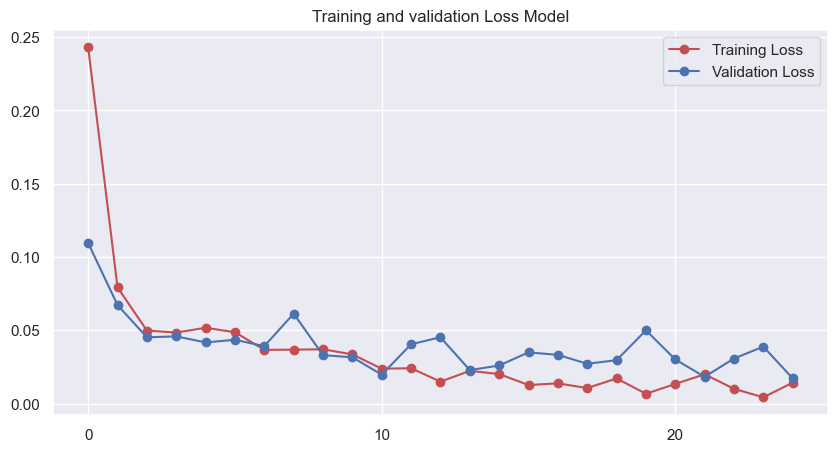

<Figure size 640x480 with 0 Axes>

In [22]:
sns.set()
epochs = range(0, len(acc))
loss = history.history['loss']
val_loss = history.history['val_loss']


fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.plot(epochs, loss, 'r', label='Training Loss', marker="o")
plt.plot(epochs, val_loss, 'b', label='Validation Loss', marker="o")
plt.title('Training and validation Loss Model')
plt.xticks(np.arange(0, len(acc), 10))
plt.legend(loc=0)
#plt.savefig('Multiclass Model .png')
plt.figure()
plt.show()

## Sparse categorical accuracy Model

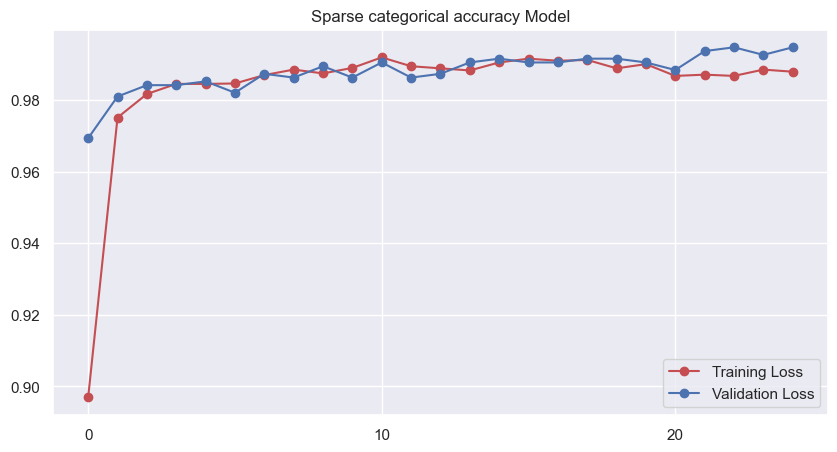

<Figure size 640x480 with 0 Axes>

In [23]:
sns.set()
epochs = range(0, len(acc))
loss = history.history['sparse_categorical_accuracy']
val_loss = history.history['val_sparse_categorical_accuracy']


fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.plot(epochs, loss, 'r', label='Training Loss', marker="o")
plt.plot(epochs, val_loss, 'b', label='Validation Loss', marker="o")
plt.title('Sparse categorical accuracy Model')
plt.xticks(np.arange(0, len(acc), 10))
plt.legend(loc=0)
#plt.savefig('Multiclass Model .png')
plt.figure()
plt.show()

## Mean squared error in model

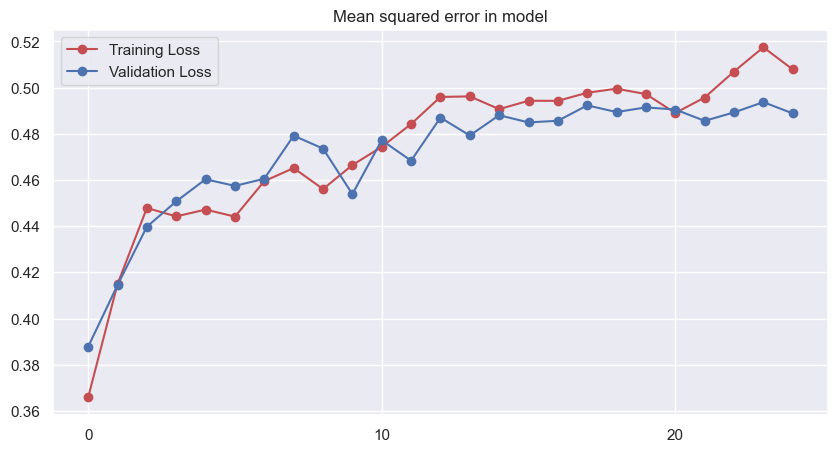

<Figure size 640x480 with 0 Axes>

In [24]:
sns.set()
epochs = range(0, len(acc))
loss = history.history['mean_squared_error']
val_loss = history.history['val_mean_squared_error']


fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.plot(epochs, loss, 'r', label='Training Loss', marker="o")
plt.plot(epochs, val_loss, 'b', label='Validation Loss', marker="o")
plt.title('Mean squared error in model')
plt.xticks(np.arange(0, len(acc), 10))
plt.legend(loc=0)
#plt.savefig('Multiclass Model .png')
plt.figure()
plt.show()

## Mean squared absolute error in model

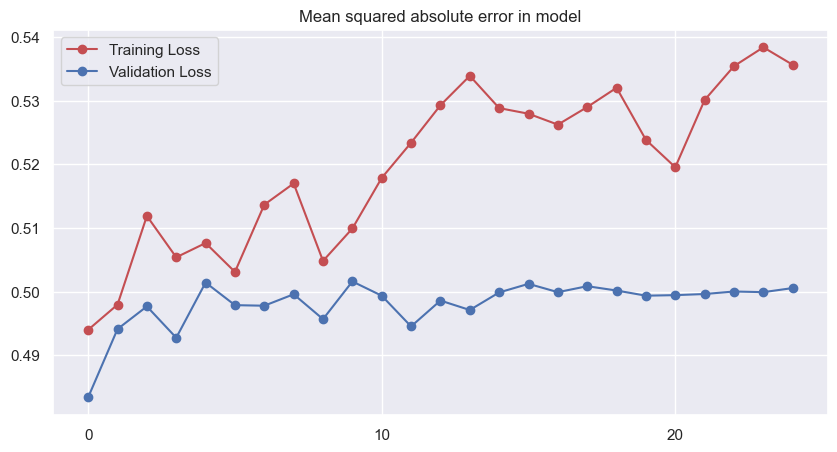

<Figure size 640x480 with 0 Axes>

In [25]:
sns.set()
epochs = range(0, len(acc))
loss = history.history['mean_absolute_error']
val_loss = history.history['val_mean_absolute_error']


fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.plot(epochs, loss, 'r', label='Training Loss', marker="o")
plt.plot(epochs, val_loss, 'b', label='Validation Loss', marker="o")
plt.title('Mean squared absolute error in model')
plt.xticks(np.arange(0, len(acc), 10))
plt.legend(loc=0)
#plt.savefig('Multiclass Model .png')
plt.figure()
plt.show()

## Mean absolute percentage error in model

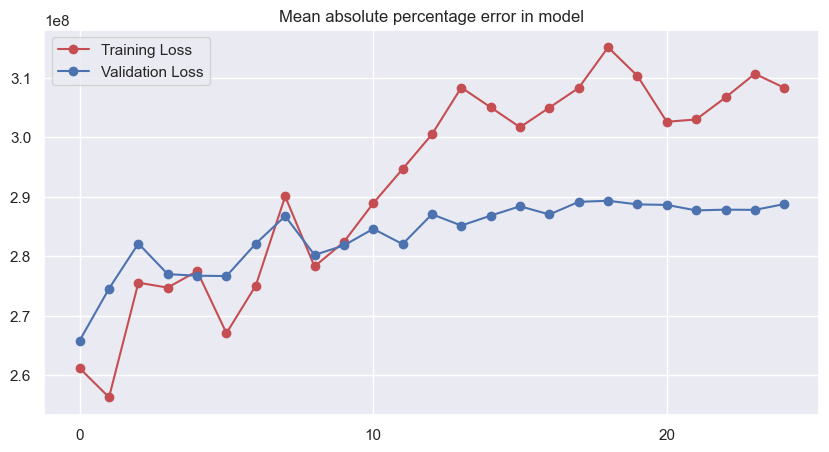

<Figure size 640x480 with 0 Axes>

In [26]:
sns.set()
epochs = range(0, len(acc))
loss = history.history['mean_absolute_percentage_error']
val_loss = history.history['val_mean_absolute_percentage_error']


fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.plot(epochs, loss, 'r', label='Training Loss', marker="o")
plt.plot(epochs, val_loss, 'b', label='Validation Loss', marker="o")
plt.title('Mean absolute percentage error in model')
plt.xticks(np.arange(0, len(acc), 10))
plt.legend(loc=0)
#plt.savefig('Multiclass Model .png')
plt.figure()
plt.show()

## Mean squared logarithmic error in model

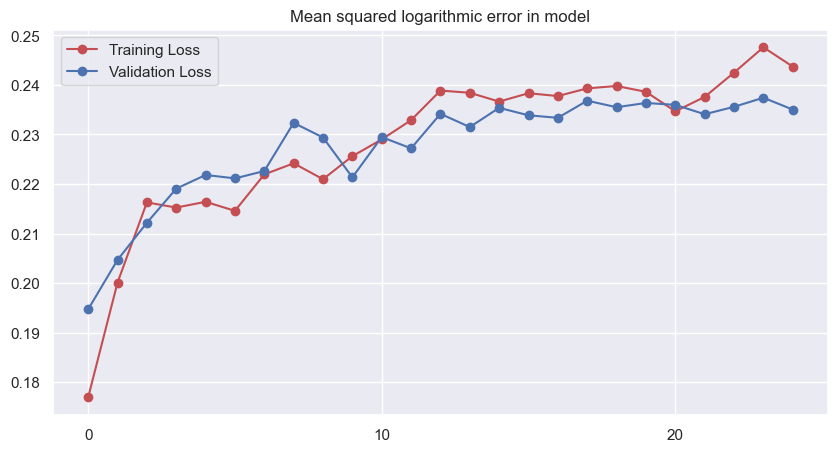

<Figure size 640x480 with 0 Axes>

In [27]:
sns.set()
epochs = range(0, len(acc))
loss = history.history['mean_squared_logarithmic_error']
val_loss = history.history['val_mean_squared_logarithmic_error']


fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.plot(epochs, loss, 'r', label='Training Loss', marker="o")
plt.plot(epochs, val_loss, 'b', label='Validation Loss', marker="o")
plt.title('Mean squared logarithmic error in model')
plt.xticks(np.arange(0, len(acc), 10))
plt.legend(loc=0)
#plt.savefig('Multiclass Model .png')
plt.figure()
plt.show()

## Cosine similarity in model

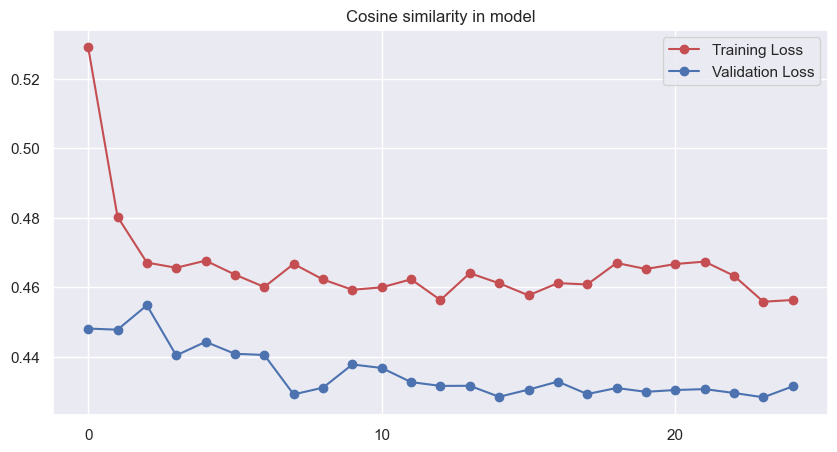

<Figure size 640x480 with 0 Axes>

In [28]:
sns.set()
epochs = range(0, len(acc))
loss = history.history['cosine_similarity']
val_loss = history.history['val_cosine_similarity']


fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.plot(epochs, loss, 'r', label='Training Loss', marker="o")
plt.plot(epochs, val_loss, 'b', label='Validation Loss', marker="o")
plt.title('Cosine similarity in model')
plt.xticks(np.arange(0, len(acc), 10))
plt.legend(loc=0)
#plt.savefig('Multiclass Model .png')
plt.figure()
plt.show()

## Log-Cosh Loss

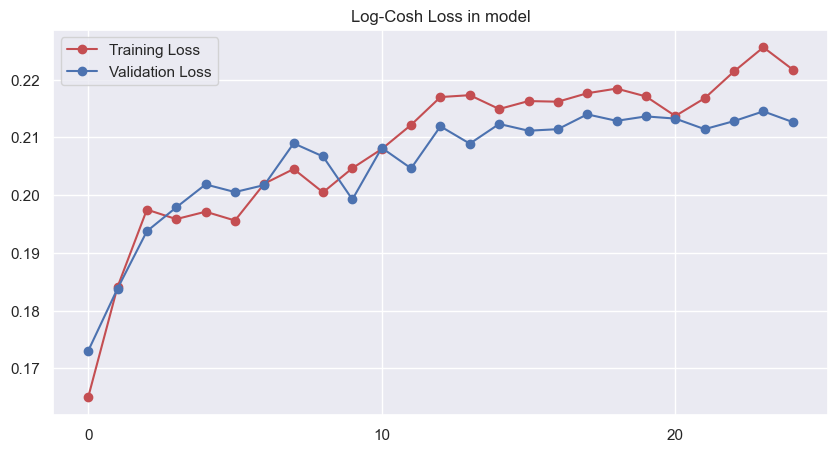

<Figure size 640x480 with 0 Axes>

In [29]:
sns.set()
epochs = range(0, len(acc))
loss = history.history['logcosh']
val_loss = history.history['val_logcosh']


fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.plot(epochs, loss, 'r', label='Training Loss', marker="o")
plt.plot(epochs, val_loss, 'b', label='Validation Loss', marker="o")
plt.title('Log-Cosh Loss in model')
plt.xticks(np.arange(0, len(acc), 10))
plt.legend(loc=0)
#plt.savefig('Multiclass Model .png')
plt.figure()
plt.show()

# Model Evaluation 

## Model Evaluation Results

In [30]:
score = model.evaluate(test_data,test_target)
print('\nTest loss:', score[0])
print('Test accuracy:', score[1])
print('\nTest loss(%):', score[0]*100)
print('Test accuracy(%):', score[1]*100)

30/30 [==============================] - 23s 757ms/step - loss: 0.0172 - accuracy: 0.9947 - sparse_categorical_accuracy: 0.9947 - mean_squared_error: 0.4889 - mean_absolute_error: 0.5006 - mean_absolute_percentage_error: 288754752.0000 - mean_squared_logarithmic_error: 0.2350 - cosine_similarity: 0.4314 - logcosh: 0.2126

Test loss: 0.017170194536447525
Test accuracy: 0.9947145581245422

Test loss(%): 1.7170194536447525
Test accuracy(%): 99.47145581245422


## Confution Matrix

 1/30 [>.............................] - ETA: 6s

2022-11-22 01:45:47.715992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 21s 733ms/step


<Figure size 1000x500 with 0 Axes>

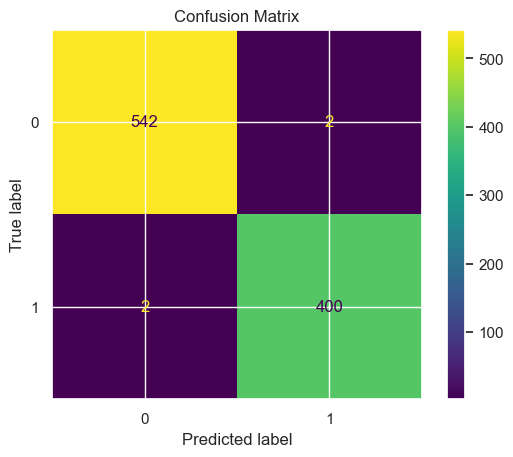

<Figure size 640x480 with 0 Axes>

In [31]:
fig = plt.gcf()
fig.set_size_inches(10, 5)

clf = model
pred = model.predict(x_test)[:, 1]
# print(pred)
predictions = (pred > 0.5).astype(int)
# print(predictions)
# print(y_test)
cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.figure()
plt.show()

In [32]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f'TN : {tn}, \nFP : {fp}, \nFN : {fn}, \nTP : {tp}')

TN : 542, 
FP : 2, 
FN : 2, 
TP : 400


## Sensitivity / True Positive Rate

In [33]:
# Sensitivity = True Positives/ (True Positives + True Negatives)
sensitivity = tp / (tp + tn)
print(f"Sensitivity : {sensitivity}")

Sensitivity : 0.42462845010615713


## Specificity / True Negative Rate:

In [34]:
# Specificity = True Negatives/ (False Positives + True Negatives)
specificity = tn / (fp+tn)
print(f"Specificity : {specificity}")

Specificity : 0.9963235294117647


## ROC AUC Score

In [35]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, predictions)
print(f"ROC AUC: {score:.4f}")

# The area under the ROC curve (AUC) results were considered 
# excellent for AUC values between 0.9-1
# good for AUC values between 0.8-0.9 
# fair for AUC values between 0.7-0.8
# poor for AUC values between 0.6-0.7 
# failed for AUC values between 0.5-0.6

ROC AUC: 0.9957


## ROC Curve

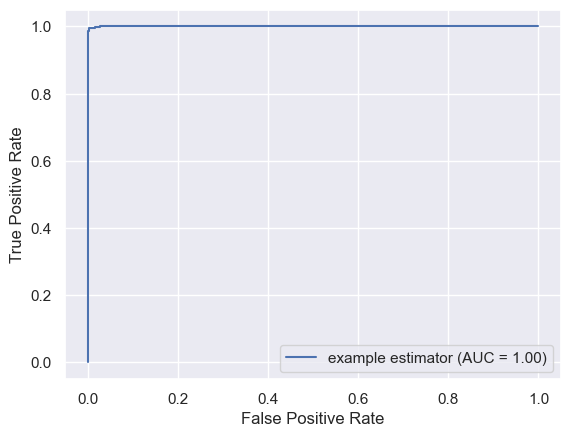

In [36]:


fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
#plt.savefig('Multiclass Model .png')
plt.show()

##  Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       544
           1       1.00      1.00      1.00       402

    accuracy                           1.00       946
   macro avg       1.00      1.00      1.00       946
weighted avg       1.00      1.00      1.00       946



/Users/lalithk90/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2148: UserWarning: labels size, 10, does not match size of target_names, 9
  warnings.warn(
/Users/lalithk90/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lalithk90/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lalithk90/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.p

<AxesSubplot: >

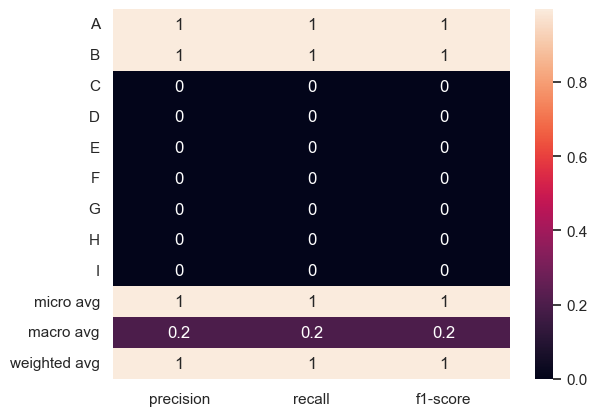

In [37]:

target_names = list("ABCDEFGHI")
labels = np.arange(10)

classification_report_1 = classification_report(y_test, predictions)
print(classification_report_1)
classification_report = classification_report(y_test, predictions, labels=labels,
                                              target_names=target_names,
                                              output_dict=True)

sns.heatmap(pd.DataFrame(classification_report).iloc[:-1, :].T, annot=True)

## Accuracy Score

In [38]:

y_pred = predictions
y_true = y_test

ac_s_without_normalize = accuracy_score(y_true, y_pred)
print(f"Accuracy score without normalize : {ac_s_without_normalize}")

ac_s_with_normalize = accuracy_score(y_true, y_pred, normalize=False)
print(f"Accuracy score with normalize: {ac_s_with_normalize}")

Accuracy score without normalize : 0.9957716701902748
Accuracy score with normalize: 942


## Balance Accuracy Score

In [39]:

balanced_accuracy_score = balanced_accuracy_score(y_true, y_pred)
print(f"Balanced accuracy score : {balanced_accuracy_score}")

Balanced accuracy score : 0.9956742025168277


## Average precision score

In [40]:

average_precision_score = average_precision_score(y_true, y_pred)
print(f"Average precision score : {average_precision_score}")

Average precision score : 0.9921886680112214


## Precision Score

Precision score macro : 0.9956742025168277
Precision score micro : 0.9957716701902748
Precision score weighted : 0.9957716701902748
Precision score : [0.99632353 0.99502488]


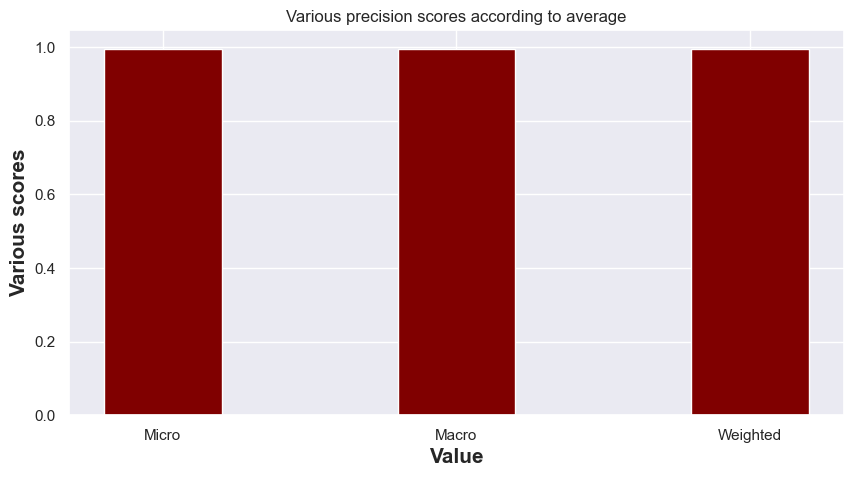

In [41]:


precision_score_macro = precision_score(y_true, y_pred, average='macro')

precision_score_micro = precision_score(y_true, y_pred, average='micro')

precision_score_weighted = precision_score(y_true, y_pred, average='weighted')

precision_score = precision_score(y_true, y_pred, average=None)

print(f"Precision score macro : {precision_score_macro}")
print(f"Precision score micro : {precision_score_micro}")
print(f"Precision score weighted : {precision_score_weighted}")
print(f"Precision score : {precision_score}")


data = {'Micro': precision_score_macro, 'Macro': precision_score_micro,
        'Weighted': precision_score_weighted}
values = list(data.keys())
results = list(data.values())

fig = plt.figure(figsize=(10, 5))

# creating the bar plot
plt.bar(values, results, color='maroon',
        width=0.4)

plt.xlabel('Value', fontweight='bold', fontsize=15)
plt.ylabel('Various scores', fontweight='bold', fontsize=15)
plt.title("Various precision scores according to average")
#plt.savefig('Multiclass Model .png')
plt.show()

## Recall Score

Recall score macro : 0.9956742025168277
Recall score micro : 0.9957716701902748
Recall score weighted : 0.9957716701902748
Recall score : [0.99632353 0.99502488]


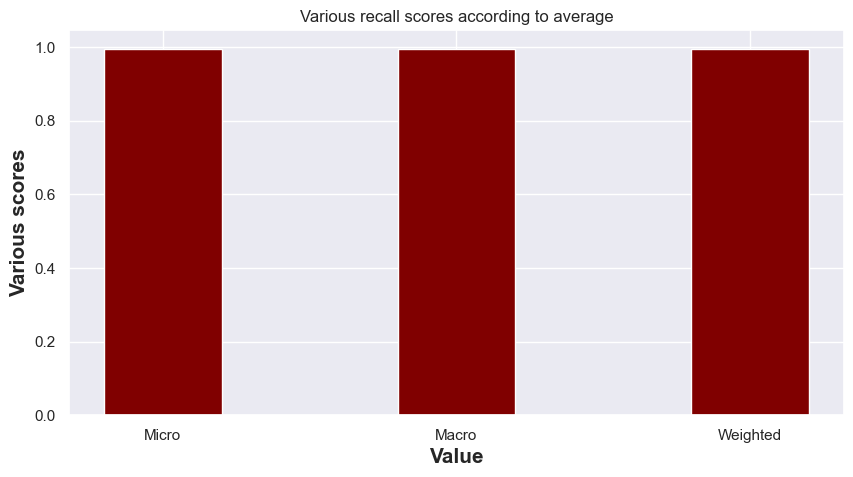

In [42]:


recall_score_macro = recall_score(y_true, y_pred, average='macro')

recall_score_micro = recall_score(y_true, y_pred, average='micro')

recall_score_weighted = recall_score(y_true, y_pred, average='weighted')

recall_score = recall_score(y_true, y_pred, average=None)


print(f"Recall score macro : {recall_score_macro}")
print(f"Recall score micro : {recall_score_micro}")
print(f"Recall score weighted : {recall_score_weighted}")
print(f"Recall score : {recall_score}")

data = {'Micro': recall_score_macro, 'Macro': recall_score_micro,
        'Weighted': recall_score_weighted}
values = list(data.keys())
results = list(data.values())

fig = plt.figure(figsize=(10, 5))

# creating the bar plot
plt.bar(values, results, color='maroon',
        width=0.4)

plt.xlabel('Value', fontweight='bold', fontsize=15)
plt.ylabel('Various scores', fontweight='bold', fontsize=15)
plt.title("Various recall scores according to average")
#plt.savefig('Multiclass Model .png')
plt.show()

## F1 Score

Recall score macro : 0.9956742025168277
Recall score micro : 0.9957716701902748
Recall score weighted : 0.9957716701902748
Recall score : [0.99632353 0.99502488]


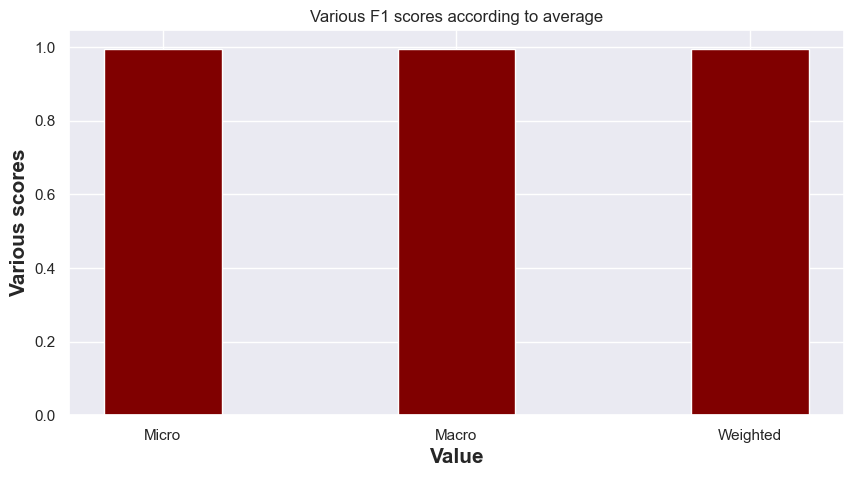

In [43]:


f1_score_macro = f1_score(y_true, y_pred, average='macro')

f1_score_micro = f1_score(y_true, y_pred, average='micro')

f1_score_weighted = f1_score(y_true, y_pred, average='weighted')

f1_score = f1_score(y_true, y_pred, average=None)

print(f"Recall score macro : {f1_score_macro}")
print(f"Recall score micro : {f1_score_micro}")
print(f"Recall score weighted : {f1_score_weighted}")
print(f"Recall score : {f1_score}")

data = {'Micro': f1_score_macro, 'Macro': f1_score_micro,
        'Weighted': f1_score_weighted}
values = list(data.keys())
results = list(data.values())

fig = plt.figure(figsize=(10, 5))

# creating the bar plot
plt.bar(values, results, color='maroon',
        width=0.4)

plt.xlabel('Value', fontweight='bold', fontsize=15)
plt.ylabel('Various scores', fontweight='bold', fontsize=15)
plt.title("Various F1 scores according to average")
#plt.savefig('Multiclass Model .png')
plt.show()

## Binary accuracy

In [44]:
m = tf.keras.metrics.binary_accuracy(y_true, y_pred)
print(f"Binary accuracy: {m}")

Binary accuracy: 0.9957716464996338


## Categorical accuracy

In [45]:
m = tf.keras.metrics.categorical_accuracy(y_true, y_pred)
print(f"Categorical accuracy: {m}")

Categorical accuracy: 1.0


# Grad-CAM


In [46]:
# model = tf.keras.models.load_model("model-v3.h5")

for idx in range(len(model.layers)):
    print(f'Name : {model.get_layer(index=idx).name}, Shape :  {model.get_layer(index=idx).output_shape}')

Name : model, Shape :  (None, 224, 224, 384)
Name : conv2d_3, Shape :  (None, 222, 222, 128)
Name : activation, Shape :  (None, 222, 222, 128)
Name : max_pooling2d, Shape :  (None, 111, 111, 128)
Name : conv2d_4, Shape :  (None, 109, 109, 64)
Name : activation_1, Shape :  (None, 109, 109, 64)
Name : max_pooling2d_1, Shape :  (None, 54, 54, 64)
Name : conv2d_5, Shape :  (None, 52, 52, 32)
Name : activation_2, Shape :  (None, 52, 52, 32)
Name : max_pooling2d_2, Shape :  (None, 26, 26, 32)
Name : flatten, Shape :  (None, 21632)
Name : dropout, Shape :  (None, 21632)
Name : dense, Shape :  (None, 128)
Name : dropout_1, Shape :  (None, 128)
Name : dense_1, Shape :  (None, 64)
Name : dropout_2, Shape :  (None, 64)
Name : dense_2, Shape :  (None, 32)
Name : dropout_3, Shape :  (None, 32)
Name : dense_3, Shape :  (None, 2)


In [47]:
class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName

        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output.shape) == 4:
                return layer.name

        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(inputs=[self.model.inputs], outputs= [self.model.get_layer(self.layerName).output, self.model.output])

        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]

        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads

        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))

        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")

        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
        colormap=cv2.COLORMAP_JET):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

In [49]:
model = tf.keras.models.load_model("model-v5.h5")
# image list
path_normal = "./TRAINING/NORMAL/IM-0327-0001.jpeg"
path_virus = "./TRAINING/NORMAL/person947_virus_1618.jpeg"
path_covid = "./TRAINING/COVID/kjr-21-e25-g001-l-a.jpg"
images_list = [path_covid, path_virus, path_covid]
titles = ["Origning Image","Heatmap","Output"]
grad_cam_sup_titles = ["Normal Image GradCAM plot","Not Covid but Virus Image GradCAM plot","Covid Image GradCAM plot"]

In [50]:
def preprocess(img):
    img_size = 224
    img = np.array(img)

    if (img.ndim == 3):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img

    gray = gray/255
    resized = cv2.resize(gray, (img_size, img_size))
    reshaped = resized.reshape(1, img_size, img_size)
    return reshaped

In [51]:
def gen_heatmap(path):
    img = cv2.imread(path)
    orig = img
    image = preprocess(img)
    image = img_to_array(image)

    preds = model.predict(image)
    i = np.argmax(preds[0])

    # initialize our gradient class activation map and build the heatmap
    cam = GradCAM(model, i)
    heatmap = cam.compute_heatmap(image)

    # resize the resulting heatmap to the original input image dimensions
    # and then overlay heatmap on top of the image
    heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
    (heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)
    return orig, heatmap, output

### Covid Negative / Positive Images GradCAM plot

0
1/1 [==============================] - 0s 113ms/step


2022-11-22 01:47:04.995669: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 282.81it/s]


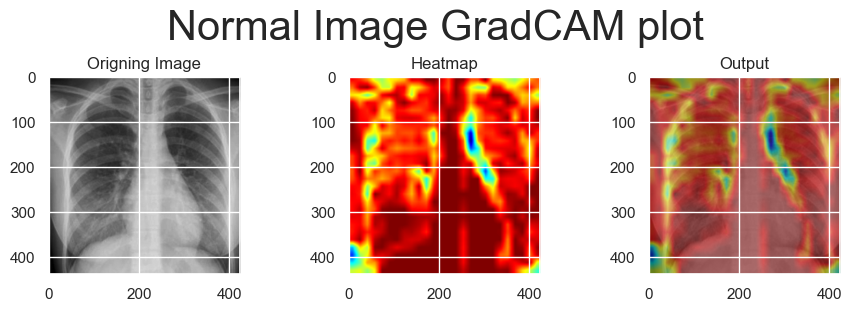

1
1/1 [==============================] - 0s 17ms/step


100%|██████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 59.77it/s]


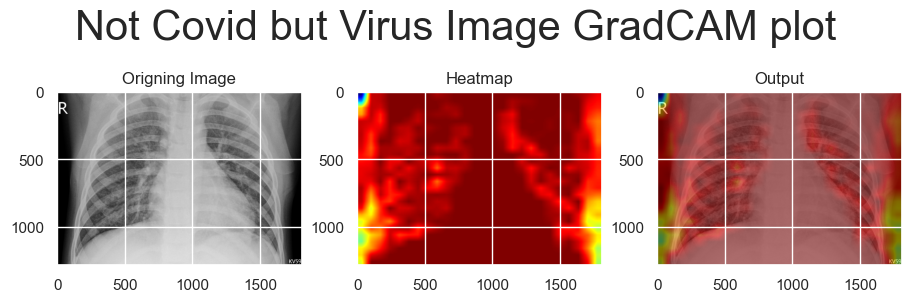

2
1/1 [==============================] - 0s 12ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 337.24it/s]


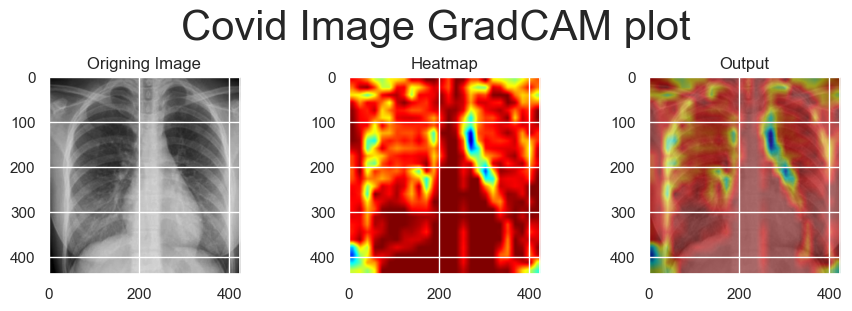

In [52]:
# draw the predicted label on the output image
n_row = 1
n_col = 3
figsize = (n_col*3, n_row*3)

def plot_grad_cam_images(i):
    images = gen_heatmap(images_list[i])
    fig, ax = plt.subplots(n_row, n_col, figsize=figsize, constrained_layout=True)
    # Add title to subplot
    fig.suptitle(grad_cam_sup_titles[i],fontsize=30)
    for row in tqdm(range(n_row)):
        for col in range(n_col):
            ax[col].imshow(images[row*n_col + col], cmap='gray')
            ax[col].set_title(titles[col])
    plt.show()
for key in range(len(images_list)):
    print(key)
    plot_grad_cam_images(key)

## Saliency Map


In [53]:
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize

from tf_keras_vis.utils.scores import CategoricalScore

score = CategoricalScore(20)

#Create Saliency object
saliency = Saliency(model, clone=False)

def gen_images(path):
    img = cv2.imread(path)
    orig = img
    image = preprocess(img)
    image = img_to_array(image)
    print(image.shape)
    return image


image = gen_images(images_list[0])

# Generate saliency map
saliency_map = saliency(score, image)
saliency_map = normalize(saliency_map)

subprot_args = {
   'nrows': 1,
   'ncols': 4,
   'figsize': (6, 3),
   'subplot_kw': {'xticks': [], 'yticks': []}
}
f, ax = plt.subplots(**subprot_args)
for i in range(len(saliency_map)):
    ax[i].imshow(saliency_map[i], cmap='jet')
plt.tight_layout()
plt.show()

saliency_map = saliency(score, input_images, smooth_samples=20)
saliency_map = normalize(saliency_map)

f, ax = plt.subplots(**subprot_args)
for i in range(len(saliency_map)):
    ax[i].imshow(saliency_map[i], cmap='jet')
plt.tight_layout()
plt.show()

(1, 224, 224)


ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 224, 224, 1), found shape=(1, 1, 224, 224)

In [ ]:
def gen_saliency(path):
    img = cv2.imread(path)
    orig = img
    image = preprocess(img)
    image = img_to_array(image)

    preds = model.predict(image)
    i = np.argmax(preds[0])

    # initialize our gradient class activation map and build the heatmap
    cam = GradCAM(model, i)
    heatmap = cam.compute_heatmap(image)

    # resize the resulting heatmap to the original input image dimensions
    # and then overlay heatmap on top of the image
    heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
    (heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)
    return orig, heatmap, output

### Covid Negative / Positive Images Saliency Map plot

In [ ]:
x_test = 
def gen_images(path):
    img = cv2.imread(path)
    orig = img
    image = preprocess(img)
    image = img_to_array(image)
    return image


In [ ]:
from vis.visualization import visualize_saliency

def plot_saliency(img_idx=None):
    img_idx = plot_features_map(img_idx)
    grads = visualize_saliency(cnn_saliency, -1, filter_indices=ytest[img_idx][0], 
                               seed_input=x_test[img_idx], backprop_modifier=None,
                               grad_modifier="absolute")
    predicted_label = labels[np.argmax(cnn.predict(x_test[img_idx].reshape(1,32,32,3)),1)[0]]
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    ax[0].imshow(x_test[img_idx])
    ax[0].set_title('original img id {} - {}'.format(img_idx, labels[ytest[img_idx][0]]))
    ax[1].imshow(grads, cmap='jet')
    ax[1].set_title('saliency - predicted {}'.format(predicted_label))

plot_saliency()